<a href="https://colab.research.google.com/github/oxBinaryBrain/ShadowFox/blob/main/Shadowfox_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Language Model (Advanced)

Model used = BERT


In [9]:
import torch
from transformers import BertTokenizer, BertForMaskedLM

In [2]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'c

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [3]:
def predict_masked_words(text):
    # Encode the text and create a tensor
    input_ids = tokenizer.encode(text, return_tensors='pt')

    # Find the position of the [MASK] token
    mask_token_index = torch.where(input_ids == tokenizer.mask_token_id)[1]

    # Predict tokens
    with torch.no_grad():
        outputs = model(input_ids)
        predictions = outputs[0]

    # Extract the predicted word
    predicted_index = torch.argmax(predictions[0, mask_token_index]).item()
    predicted_word = tokenizer.decode([predicted_index])

    return predicted_word

In [4]:
# Example sentences with [MASK]
sentences = [
    "The quick brown fox jumps over the lazy [MASK].",
    "I love to play [MASK] on weekends.",
    "The capital of France is [MASK]."
]

# Generate predictions
for sentence in sentences:
    predicted_word = predict_masked_words(sentence)
    completed_sentence = sentence.replace("[MASK]", predicted_word)
    print(f"Original: {sentence}\nCompleted: {completed_sentence}\n")

Original: The quick brown fox jumps over the lazy [MASK].
Completed: The quick brown fox jumps over the lazy water.

Original: I love to play [MASK] on weekends.
Completed: I love to play football on weekends.

Original: The capital of France is [MASK].
Completed: The capital of France is paris.



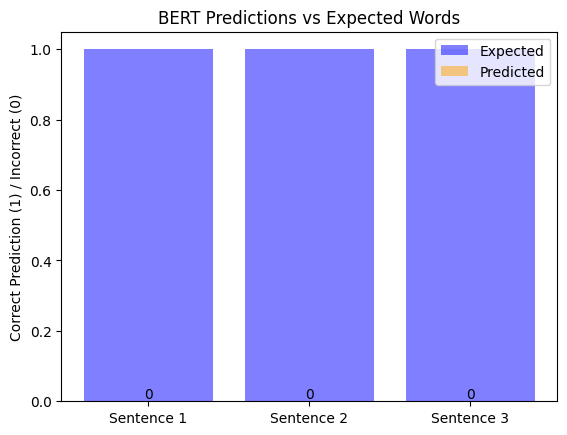

In [ ]:
import matplotlib.pyplot as plt

# Example data for visualization
sentences = ["The quick brown fox jumps over the lazy [MASK].",
             "I love playing [MASK] on weekends.",
             "The Eiffel Tower is located in [MASK]."] # Added [MASK] to the sentences
predicted_words = [predict_masked_words(sentence) for sentence in sentences]
original_words = ["dog", "soccer", "Paris"]  # Expected words for comparison

# Create a bar chart comparing predicted vs expected words
x = range(len(sentences))
expected_heights = [1] * len(sentences)
predicted_heights = [1 if predicted == original else 0 for predicted, original in zip(predicted_words, original_words)]

plt.bar(x, expected_heights, label='Expected', alpha=0.5, color='blue')
plt.bar(x, predicted_heights, label='Predicted', alpha=0.5, color='orange')

plt.xticks(x, [f"Sentence {i+1}" for i in range(len(sentences))])
plt.ylabel('Correct Prediction (1) / Incorrect (0)')
plt.title('BERT Predictions vs Expected Words')
plt.legend()

# Adding value annotations
for i in x:
    plt.text(i, predicted_heights[i], str(predicted_heights[i]), ha='center', va='bottom')

plt.show()

Version 2

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForMaskedLM

In [11]:
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.eval()  # Set the model to evaluation mode

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwi

In [16]:
# ipython-input-12-e304e0132941
import numpy as np # Import numpy at the beginning of the cell
def predict_masked_words_with_visualization(text):
    # Encode the text and create a tensor
    input_ids = tokenizer.encode(text, return_tensors='pt')

    # Find the position of the [MASK] token
    mask_token_index = torch.where(input_ids == tokenizer.mask_token_id)[1]

    # Predict tokens
    with torch.no_grad():
        outputs = model(input_ids)
        predictions = outputs[0]

    # Extract the predicted probabilities for the masked token
    predicted_probs = torch.softmax(predictions[0, mask_token_index], dim=-1).squeeze().numpy()
    # .squeeze() is added to remove dimensions of size 1
    # allowing you to properly index into the probabilities

    # Get the top 5 predicted tokens and their probabilities
    top_k = 5
    top_k_indices = np.argsort(predicted_probs)[-top_k:][::-1] # Now np is defined
    top_k_probs = predicted_probs[top_k_indices]
    top_k_tokens = tokenizer.convert_ids_to_tokens(top_k_indices)

    return top_k_tokens, top_k_probs

Predicted Token: water, Probability: 0.1065
Predicted Token: river, Probability: 0.0641
Predicted Token: grass, Probability: 0.0578
Predicted Token: stream, Probability: 0.0385
Predicted Token: lake, Probability: 0.0205


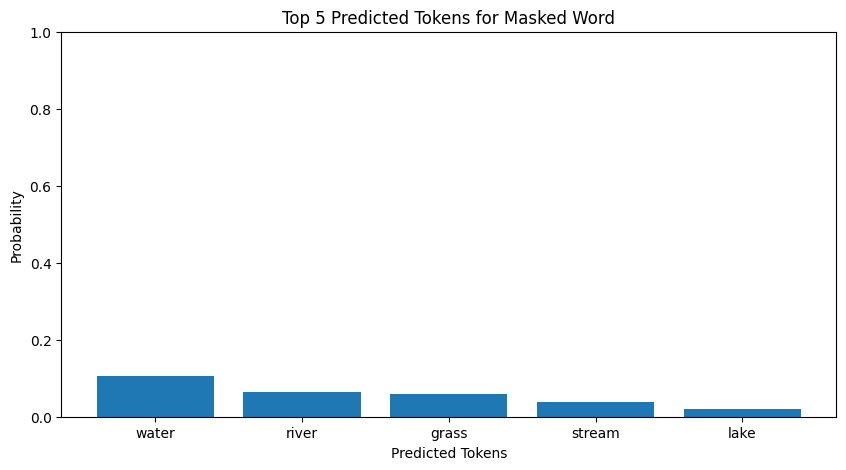

In [17]:
# Example sentence with [MASK]
sentence = "The quick brown fox jumps over the lazy [MASK]."

# Generate predictions
top_k_tokens, top_k_probs = predict_masked_words_with_visualization(sentence)

# Print the predictions
for token, prob in zip(top_k_tokens, top_k_probs):
    print(f"Predicted Token: {token}, Probability: {prob:.4f}")

# Visualization
plt.figure(figsize=(10, 5))
plt.bar(top_k_tokens, top_k_probs)
plt.xlabel('Predicted Tokens')
plt.ylabel('Probability')
plt.title('Top 5 Predicted Tokens for Masked Word')
plt.ylim(0, 1)
plt.show()